# Transfer Learning 5 years later Walters et al.: 3 domain features
# Table of contents 
1. [Linear Regression](#LinearRegression)
2. [MLP (Dense)](#MLP)
3. [AE combined latent subset features](#AE_combined_subsetFeatures)
4. [AE combined latent all features](#AE_combined_allFeatures)
5. [AE OTU latent](#AE_latentOTU)

In [1]:
from data import *
from train_2 import *
from transfer_learning import *
from test_functions import *
from layers import *
from utils import *
from loss import *
from metric import *
from results import *
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

Using TensorFlow backend.


In [2]:
df_microbioma_train, df_microbioma_test, \
df_microbioma_transfer_learning_train, df_microbioma_transfer_learning_test, \
df_domain_train, df_domain_test, df_domain_transfer_learning_train, df_domain_transfer_learning_test,\
otu_columns, domain_columns = \
    read_df_with_transfer_learning_2otufiles_fewerDomainFeatures(
              metadata_names=['age','Temperature','Precipitation3Days'],
              otu_filename='data/otu_table_all_80.csv',
              metadata_filename='data/metadata_table_all_80.csv',
              otu_transfer_filename='data/Walters5yearsLater/otu_table_Walters5yearsLater.csv',
              metadata_transfer_filename='data/Walters5yearsLater/metadata_table_Walters5yearsLater.csv')

In [3]:
print(df_domain_train.shape)
print(df_domain_test.shape)
print(df_domain_transfer_learning_train.shape)
print(df_domain_transfer_learning_test.shape)

(4251, 3)
(373, 3)
(29, 3)
(13, 3)


In [4]:
print('TRAIN:')
print('age:' + str(df_domain_transfer_learning_train.loc[:,'age'].mean()))
print('rain:' + str(df_domain_transfer_learning_train.loc[:,'Precipitation3Days'].mean()))
print('Tª:' + str(df_domain_transfer_learning_train.loc[:,'Temperature'].mean()))
    
print('TEST:')
print('age:' + str(df_domain_transfer_learning_test.loc[:,'age'].mean()))
print('rain:' + str(df_domain_transfer_learning_test.loc[:,'Precipitation3Days'].mean()))
print('Tª:' + str(df_domain_transfer_learning_test.loc[:,'Temperature'].mean()))

TRAIN:
age:8.344827586206897
rain:0.2737931034482759
Tª:71.4896551724138
TEST:
age:8.0
rain:0.23
Tª:70.4076923076923


In [8]:
df_microbioma_test

,4479944,513055,519510,810959,849092,1042671,818174,585221,1033380,875704,...,966091,55354,515709,902698,591499,569066,823091,219094,961783,823633
11116.C14A66.1198094,17,0,10,0,1,0,1,0,0,2,...,6,0,4,26,0,3,3,0,512,1
11116.A28B070.1197241,49,0,34,0,5,0,61,0,0,23,...,15,0,21,19,24,6,5,0,42,4
11116.L29A063.1193919,2,14,183,0,33,0,34,0,0,15,...,7,114,9,56,17,0,15,0,68,21
11116.I17A099.1195959,0,0,0,3,168,0,0,0,0,2,...,0,1,3,10,0,0,0,0,136,1
11116.I07A091.1194537,6,1,3,0,2168,0,4,0,0,0,...,1,8,4,29,8,37,1,0,1116,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11116.A28A100.1194675,12,0,11,0,1,0,2,0,0,4,...,10,0,1,13,101,13,3,0,1356,0
11116.A03D088.1195301,52,0,10,0,8,0,10,0,0,7,...,10,0,13,24,3,12,4,0,3737,5
11116.A23B118.1196173,28,0,59,0,87,2,60,0,0,73,...,6,1,8,33,226,261,9,0,2374,0
11116.A20C118.1193655,29,0,45,0,34,0,27,0,0,25,...,15,0,13,5,370,85,1,0,802,1


In [9]:
df_microbioma_transfer_learning_test

,4479944,513055,519510,810959,849092,1042671,818174,585221,1033380,875704,...,966091,55354,515709,902698,591499,569066,823091,219094,961783,823633
HP301.W9,6,892,120,68,68,216,1230,39,20,320,...,85,18,148,76,1,822,24,13,286,65
CML277.W6.1,22,422,46,58,43,165,620,140,6,374,...,73,1,36,26,7,528,8,5,444,21
CML277.W10,7,537,42,67,666,81,266,12,1,95,...,92,15,101,38,5,1028,11,16,123,45
IL14H.W10.1,13,294,51,164,499,311,806,6,20,186,...,78,30,162,48,5,422,19,27,133,72
B73.W6,22,277,31,25,16,85,130,326,1,118,...,92,4,37,13,4,125,15,0,286,22
MO17.W7.1,37,542,56,102,76,223,841,129,14,310,...,207,4,36,65,2,435,25,6,814,78
HP301.W12.1,14,511,18,92,48,125,237,46,9,122,...,160,89,381,46,2,146,5,6,82,68
IL14H.W4,25,493,100,56,15,582,1209,113,11,444,...,176,2,92,34,4,274,32,1,351,71
IL14H.W6,12,113,27,30,17,106,142,29,6,92,...,53,2,17,14,4,332,11,1,52,28
B73.W8,31,340,58,57,62,278,950,219,12,251,...,137,1,27,24,0,384,19,1,216,33


### Get numpy transfer_learning objects

In [5]:
data_microbioma_transfer_learning_train = df_microbioma_transfer_learning_train.to_numpy(dtype=np.float32)
data_microbioma_transfer_learning_test = df_microbioma_transfer_learning_test.to_numpy(dtype=np.float32)
data_domain_transfer_learning_train = df_domain_transfer_learning_train.to_numpy(dtype=np.float32)
data_domain_transfer_learning_test = df_domain_transfer_learning_test.to_numpy(dtype=np.float32)

# 1. Linear regression <a name="LinearRegression"></a>

In [6]:
def model(shape_in, shape_out, output_transform):
    in_layer = layers.Input(shape=(shape_in,))
    net = in_layer
    net = layers.Dense(shape_out, activation='linear')(net)
    if output_transform is not None:
        net = output_transform(net)
    out_layer = net
    
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    return model

def compile_model(model, optimizer, reconstruction_error, input_transform, output_transform):
    metrics = get_experiment_metrics(input_transform, output_transform)[0][3:]
    model.compile(optimizer=optimizer, loss=reconstruction_error, metrics=metrics)

In [7]:
def model_fn():
    m = model(shape_in=3,
              shape_out=717,
              output_transform=None)
    
    compile_model(model=m,
                  optimizer=optimizers.Adam(lr=0.001),
                  reconstruction_error=LossMeanSquaredErrorWrapper(CenterLogRatio(), None),
                  input_transform=CenterLogRatio(),
                  output_transform=None)
    return m, None, m, None

In [8]:
latent_space = 0
results, modelsLR = train(model_fn,
                        data_microbioma_transfer_learning_train,
                        data_domain_transfer_learning_train,
                        latent_space=latent_space,
                        folds=5,
                        epochs=100,
                        batch_size=64,
                        learning_rate_scheduler=None,
                        verbose=-1)

<p>Best iteration: <b>99</b></p>

<b>loss</b>: 1.2527 (min: 1.2291, max: 1.2978)

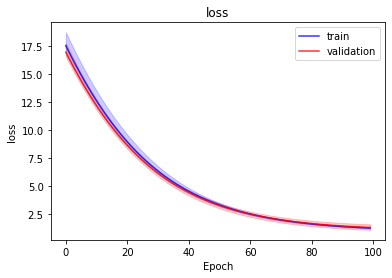

<b>domain_BrayCurtis</b>: 0.3413 (min: 0.3272, max: 0.3721)

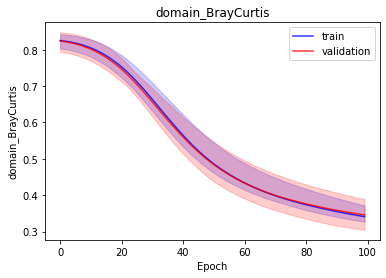

<b>domain_pearson_corr</b>: 0.6840 (min: 0.5668, max: 0.7290)

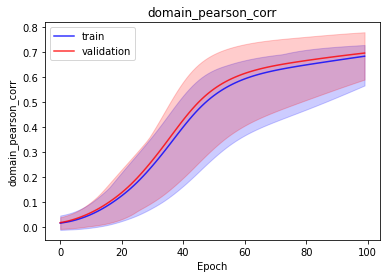

<b>domain_jensen_shannon_divergence</b>: 0.4879 (min: 0.4457, max: 0.5389)

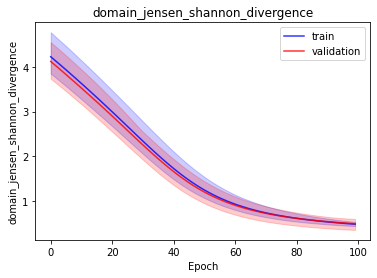

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 1.2527153730392455 | 1.229137897491455 | 1.2978380918502808 |
| domain_BrayCurtis | 0.3412646949291229 | 0.32722604274749756 | 0.37211647629737854 |
| domain_pearson_corr | 0.6839920282363892 | 0.5668017268180847 | 0.7290146946907043 |
| domain_jensen_shannon_divergence | 0.48790091276168823 | 0.4457469582557678 | 0.5389391183853149 |


[('best_lost_epoch', 99),
 ('val_loss', [1.3115556716918946, 1.0892819166183472, 1.5902159214019775]),
 ('val_domain_BrayCurtis', [0.34596762, 0.30474254, 0.38923624]),
 ('val_domain_pearson_corr', [0.6967195, 0.59041303, 0.78005165]),
 ('val_domain_jensen_shannon_divergence', [0.4988461, 0.36015418, 0.6050364])]

In [9]:
print_results(results)

In [10]:
predictions = test_model(modelsLR, CenterLogRatio, None, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_linear_regresion.txt')

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.36167725920677185 | 0.3456025719642639 | 0.39525026082992554 |
| pearson_corr | 0.6946331262588501 | 0.5656324625015259 | 0.7427903413772583 |
| jensen_shannon_divergence | 0.5422879457473755 | 0.4808829426765442 | 0.6008532047271729 |


In [11]:
predictions

array([[2.3307433e-04, 3.9638686e-03, 5.0256989e-04, ..., 6.2466846e-05,
        2.4854464e-03, 8.4794906e-04],
       [3.3113401e-04, 4.0624253e-03, 4.9354101e-04, ..., 8.6073465e-05,
        2.3516198e-03, 9.3756651e-04],
       [2.4016183e-04, 3.8967195e-03, 5.1288062e-04, ..., 6.9776237e-05,
        2.5334207e-03, 9.0332155e-04],
       ...,
       [2.4000202e-04, 3.7709854e-03, 5.5976037e-04, ..., 7.5879143e-05,
        2.6447608e-03, 9.3331037e-04],
       [4.0328605e-04, 3.8292110e-03, 7.6217123e-04, ..., 1.2607602e-04,
        2.5983991e-03, 1.0123232e-03],
       [2.4016183e-04, 3.8967195e-03, 5.1288062e-04, ..., 6.9776244e-05,
        2.5334207e-03, 9.0332143e-04]], dtype=float32)

# 2. MLP (Dense) <a name="MLP"></a>

In [12]:
def model(shape_in, shape_out, output_transform, layers_list, activation_fn):
    in_layer = layers.Input(shape=(shape_in,))
    net = in_layer
    for s in layers_list:
        net = layers.Dense(s, activation=activation_fn)(net)
    net = layers.Dense(shape_out, activation='linear')(net)
    if output_transform is not None:
        net = output_transform(net)
    out_layer = net
    
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    return model

def compile_model(model, optimizer, reconstruction_error, input_transform, output_transform):
    metrics = get_experiment_metrics(input_transform, output_transform)[0][3:]
    model.compile(optimizer=optimizer, loss=reconstruction_error, metrics=metrics)

In [13]:
def model_fn():
    m = model(shape_in=3,
              shape_out=717,
              output_transform=None,
              layers_list=[128,512],
              activation_fn='tanh')
    
    compile_model(model=m,
                  optimizer=optimizers.Adam(lr=0.01),
                  reconstruction_error=LossMeanSquaredErrorWrapper(CenterLogRatio(), None),
                  input_transform=CenterLogRatio(),
                  output_transform=None)
    return m, None, m, None

In [14]:
latent_space=0
results, modelsMLP = train(model_fn,
                        data_microbioma_transfer_learning_train,
                        data_domain_transfer_learning_train,
                        latent_space=latent_space,
                        folds=5,
                        epochs=100,
                        batch_size=64,
                        learning_rate_scheduler=None,
                        verbose=-1)

<p>Best iteration: <b>50</b></p>

<b>loss</b>: 0.7499 (min: 0.7270, max: 0.7773)

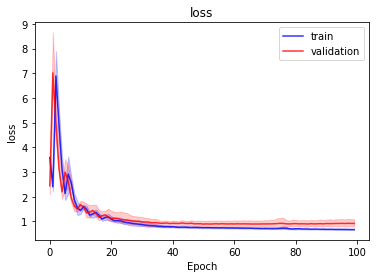

<b>domain_BrayCurtis</b>: 0.2561 (min: 0.2501, max: 0.2617)

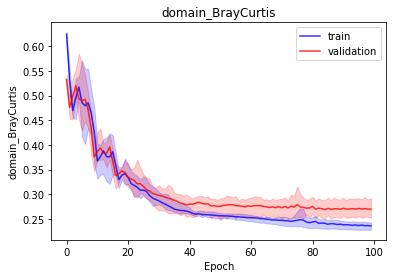

<b>domain_pearson_corr</b>: 0.8000 (min: 0.7859, max: 0.8216)

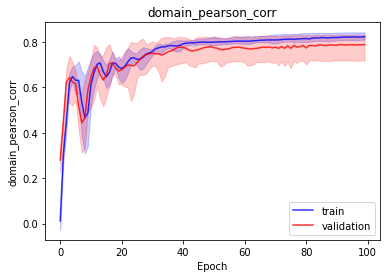

<b>domain_jensen_shannon_divergence</b>: 0.2733 (min: 0.2497, max: 0.2838)

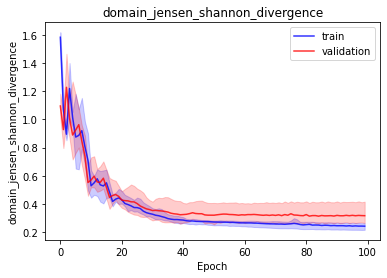

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 0.7498619556427002 | 0.7270260453224182 | 0.7773488163948059 |
| domain_BrayCurtis | 0.25608929991722107 | 0.2501314580440521 | 0.261737585067749 |
| domain_pearson_corr | 0.7999963760375977 | 0.7859445810317993 | 0.8215794563293457 |
| domain_jensen_shannon_divergence | 0.2733400762081146 | 0.24974188208580017 | 0.28383198380470276 |


[('best_lost_epoch', 50),
 ('val_loss', [0.8922462582588195, 0.7624737620353699, 1.0224902629852295]),
 ('val_domain_BrayCurtis', [0.27515262, 0.24734545, 0.29107296]),
 ('val_domain_pearson_corr', [0.7755567, 0.71658206, 0.82537335]),
 ('val_domain_jensen_shannon_divergence', [0.3216732, 0.2567179, 0.40867385])]

In [15]:
print_results(results)

In [16]:
predictions = test_model(modelsMLP, CenterLogRatio, None, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_MLP.txt')

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.27616339921951294 | 0.272037148475647 | 0.2804315686225891 |
| pearson_corr | 0.7886136174201965 | 0.7855052947998047 | 0.7926088571548462 |
| jensen_shannon_divergence | 0.3220679461956024 | 0.30887025594711304 | 0.334333211183548 |


In [17]:
predictions

array([[1.9088478e-04, 5.7152440e-03, 4.6924845e-04, ..., 4.2714149e-05,
        1.9767189e-03, 6.1692763e-04],
       [1.7849654e-04, 4.4207443e-03, 3.5431422e-04, ..., 1.0466628e-05,
        3.4458190e-03, 4.0121697e-04],
       [1.6398696e-04, 5.6619579e-03, 4.4624685e-04, ..., 8.8736044e-05,
        1.5957567e-03, 6.6586473e-04],
       ...,
       [1.5008633e-04, 5.8157463e-03, 4.5533449e-04, ..., 1.7472889e-04,
        1.2201226e-03, 7.5042795e-04],
       [2.8794055e-04, 5.0905622e-03, 5.3695595e-04, ..., 9.7854409e-06,
        3.3893206e-03, 5.9558917e-04],
       [1.6398696e-04, 5.6619579e-03, 4.4624694e-04, ..., 8.8736051e-05,
        1.5957572e-03, 6.6586479e-04]], dtype=float32)

# 3. Auto-encoder combined latent subset features <a name="AE_combined_subsetFeatures"></a>

### Get numpy train objects

In [18]:
data_microbioma_train = df_microbioma_train.to_numpy(dtype=np.float32)
data_domain_train = df_domain_train.to_numpy(dtype=np.float32)

In [19]:
data_domain_train.shape[1]

3

### To create auto-encoder combined model

| Parameter             | Value         |
|:----------------------|:--------------|
| Input transform | Percentage |
| Output transform | Softmax |
| Reconstruction Loss | LossBrayCurtis |
| Latent Space | 10 |
| Bioma Autoencoder | b -> 512 -> 256 -> 10 -> 256 -> 512 -> b |
| Domain Autoencoder | d -> 32 -> 16 -> 10 -> 256 -> 512 -> b |
| Activation Encoder | tanh |
| Activation Decoder | tanh |
| Activation Latent | tanh |
| CV folds | 0 |
| Epochs | 100 |
| Batch Size | 64 |
| Learning Rate Scheduler | none |
| Learning Rate | constant = 0.001 |
| Optimizer | Adam |


<p>Best iteration: <b>86</b></p>

<b>loss</b>: 0.6231 (min: 0.6231, max: 0.6231)

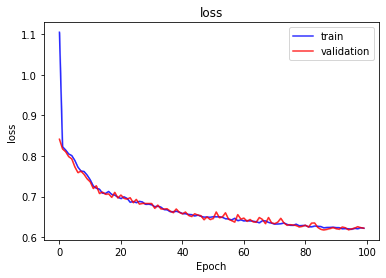

<b>bioma_loss</b>: 0.1954 (min: 0.1954, max: 0.1954)

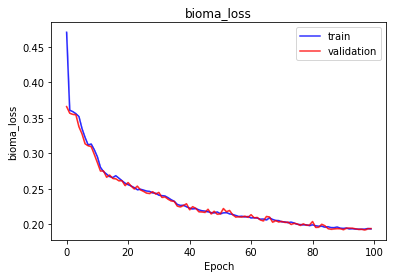

<b>domain_loss</b>: 0.4086 (min: 0.4086, max: 0.4086)

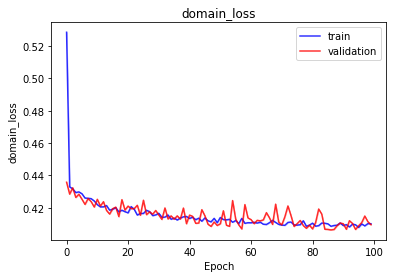

<b>latent_loss</b>: 0.0191 (min: 0.0191, max: 0.0191)

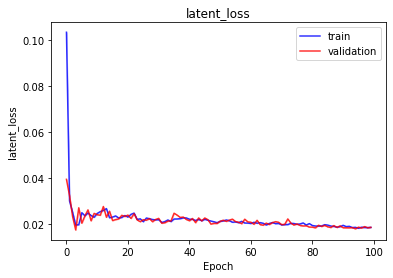

<b>bioma_mse</b>: 0.0000 (min: 0.0000, max: 0.0000)

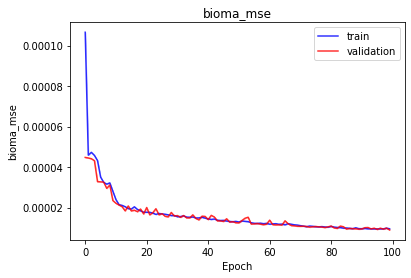

<b>bioma_mae</b>: 0.0005 (min: 0.0005, max: 0.0005)

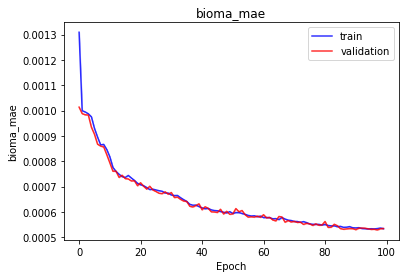

<b>bioma_mape</b>: 4840.4062 (min: 4840.4062, max: 4840.4062)

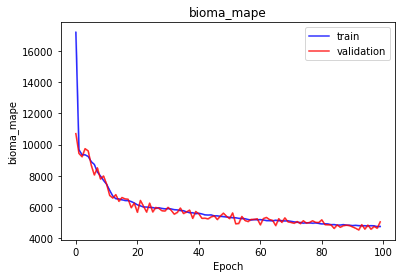

<b>bioma_BrayCurtis</b>: 0.1954 (min: 0.1954, max: 0.1954)

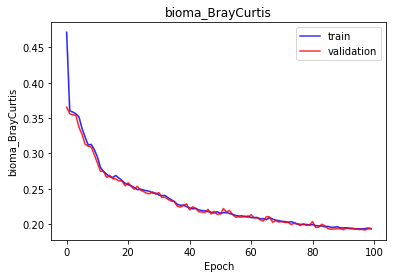

<b>bioma_pearson_corr</b>: 0.9274 (min: 0.9274, max: 0.9274)

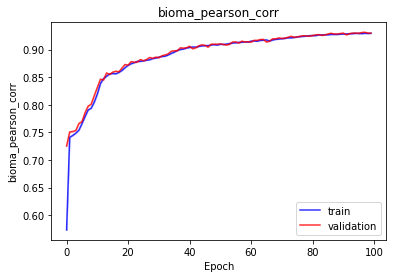

<b>bioma_jensen_shannon_divergence</b>: 0.3339 (min: 0.3339, max: 0.3339)

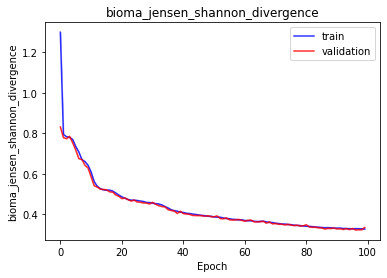

<b>domain_mse</b>: 0.0001 (min: 0.0001, max: 0.0001)

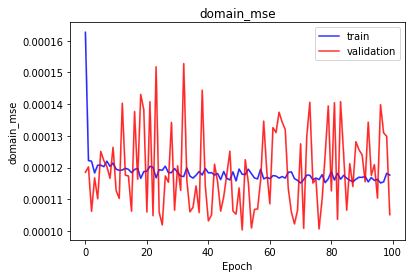

<b>domain_mae</b>: 0.0011 (min: 0.0011, max: 0.0011)

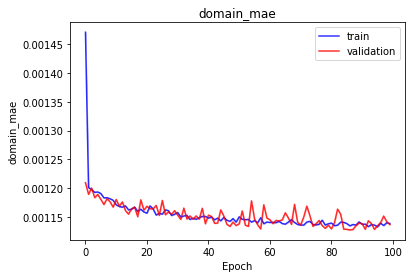

<b>domain_mape</b>: 8087.5776 (min: 8087.5776, max: 8087.5776)

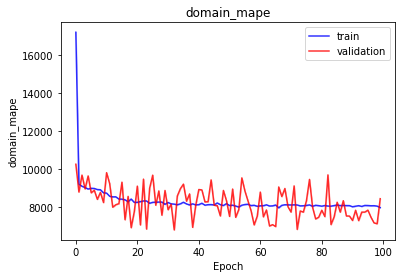

<b>domain_BrayCurtis</b>: 0.4086 (min: 0.4086, max: 0.4086)

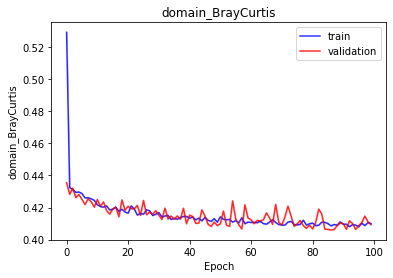

<b>domain_pearson_corr</b>: 0.7265 (min: 0.7265, max: 0.7265)

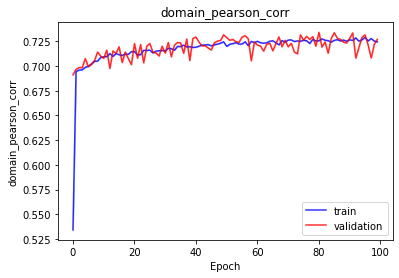

<b>domain_jensen_shannon_divergence</b>: 0.8983 (min: 0.8983, max: 0.8983)

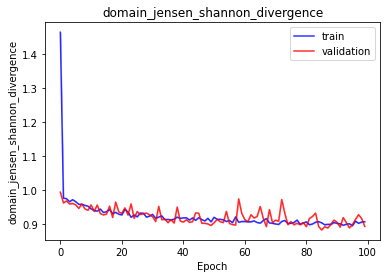

<b>latent_mae</b>: 0.0191 (min: 0.0191, max: 0.0191)

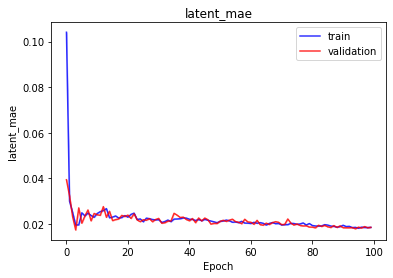

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 0.6230566699177875 | 0.6230566699177875 | 0.6230566699177875 |
| bioma_loss | 0.1954420804977417 | 0.1954420804977417 | 0.1954420804977417 |
| domain_loss | 0.40855643153190613 | 0.40855643153190613 | 0.40855643153190613 |
| latent_loss | 0.019068285822868347 | 0.019068285822868347 | 0.019068285822868347 |
| bioma_mse | 9.783483619685285e-06 | 9.783483619685285e-06 | 9.783483619685285e-06 |
| bioma_mae | 0.0005393112078309059 | 0.0005393112078309059 | 0.0005393112078309059 |
| bioma_mape | 4840.40625 | 4840.40625 | 4840.40625 |
| bioma_BrayCurtis | 0.19538778066635132 | 0.19538778066635132 | 0.19538778066635132 |
| bioma_pearson_corr | 0.9274447560310364 | 0.9274447560310364 | 0.9274447560310364 |
| bioma_jensen_shannon_divergence | 0.3338826894760132 | 0.3338826894760132 | 0.3338826894760132 |
| domain_mse | 0.00011603492748690769 | 0.00011603492748690769 | 0.00011603492748690769 |
| domain_mae | 0.0011342684738337994 | 0.0011342684738337994 | 0.0011342684738337994 |
| domain_mape | 8087.57763671875 | 8087.57763671875 | 8087.57763671875 |
| domain_BrayCurtis | 0.4086041748523712 | 0.4086041748523712 | 0.4086041748523712 |
| domain_pearson_corr | 0.7265234589576721 | 0.7265234589576721 | 0.7265234589576721 |
| domain_jensen_shannon_divergence | 0.8983076810836792 | 0.8983076810836792 | 0.8983076810836792 |
| latent_mae | 0.019064750522375107 | 0.019064750522375107 | 0.019064750522375107 |


*************

In [20]:
# Train the selected model (the best one from those with the smallest latent space (10)): no.351
experiment_metrics, models, results = perform_experiment_2(cv_folds=0, 
                        epochs=100, 
                        batch_size=64, 
                        learning_rate=0.001, 
                        optimizer=optimizers.Adam,
                        learning_rate_scheduler=None,
                        input_transform=Percentage,
                        output_transform=tf.keras.layers.Softmax,
                        reconstruction_loss=MakeLoss(LossBrayCurtis, Percentage, None), 
                        latent_space=10, 
                        layers=[512,256],
                        activation='tanh', 
                        activation_latent='tanh', 
                        data_microbioma_train=data_microbioma_train,
                        data_domain_train=data_domain_train,
                        show_results=True, 
                        device='/CPU:0')

### To get encoders and decoders to use in transfer learning model

In [21]:
model, encoder, encoder_domain, decoder = models[0]

### To predict latent space for samples in transfer learning Walters et al. subset

In [22]:
latent_transfer_learning_train = encoder.predict(data_microbioma_transfer_learning_train)
latent_transfer_learning_test = encoder.predict(data_microbioma_transfer_learning_test)

### To build model to predict latent space 
Dense model, with transfer_learning_train. With input=domain, output=10 neurons latent space

In [23]:
def model_fn_tl():
    in_layer = layers.Input(shape=(3,))
    net = layers.Dense(128, activation='tanh')(in_layer)
    net = layers.Dense(32, activation='tanh')(net)
    out_layer = layers.Dense(latent_transfer_learning_train.shape[1], activation=None)(net) # 'tanh already'
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    model.compile(optimizer=optimizers.Adam(lr=0.001), loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanSquaredError()])
    return model

In [24]:
result_tl, model_tl = train_tl_noEnsemble(model_fn_tl,
                            latent_transfer_learning_train,
                            latent_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            epochs=100,
                            batch_size=16,
                            verbose=-1)
#print_results(result_tl)
#print(result_tl)

In [25]:
# Test only Dense(domain->latent)
predictions = test_model_tl_latent(model_tl, latent_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_MLP_domain-latent_test.txt')

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| mse | 0.0018819571705535054 | 1.397343112330418e-07 | 0.07123981416225433 |


### a) Domain -> latent -> microbiome. Test set TL

In [26]:
predictions = test_model_tl_noEnsemble(model_tl, decoder, Percentage, tf.keras.layers.Softmax, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.8342608213424683 | 0.8342608213424683 | 0.8342608213424683 |
| pearson_corr | 0.10521204024553299 | 0.10521204024553299 | 0.10521204024553299 |
| jensen_shannon_divergence | 3.7314999103546143 | 3.7314999103546143 | 3.7314999103546143 |


### b) With the encoder_domain (best case)

In [27]:
# Test with encoder_biome, en vez de model_tl
predictions = test_model_tl_noEnsemble(encoder_domain, decoder, Percentage, tf.keras.layers.Softmax, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.7687588334083557 | 0.7687588334083557 | 0.7687588334083557 |
| pearson_corr | 0.11240188777446747 | 0.11240188777446747 | 0.11240188777446747 |
| jensen_shannon_divergence | 3.7038347721099854 | 3.7038347721099854 | 3.7038347721099854 |


# 4. Auto-encoder combined latent All features <a name="AE_combined_allFeatures"></a>

In [28]:
from train import *

### Get datasets with ALL domain features and numpy train objects

In [29]:
#df_microbioma_train, df_microbioma_test, \
#df_microbioma_transfer_learning_train, df_microbioma_transfer_learning_test, \
#df_domain_train, df_domain_test, df_domain_transfer_learning_train, df_domain_transfer_learning_test,\
#otu_columns, domain_columns = read_df_with_transfer_learning_subset()

In [30]:
#data_microbioma_train = df_microbioma_train.to_numpy(dtype=np.float32)
#data_domain_train = df_domain_train.to_numpy(dtype=np.float32)

In [31]:
data_domain_train.shape[1]

36

| Parameter             | Value         |
|:----------------------|:--------------|
| Input transform | Percentage |
| Output transform | Softmax |
| Reconstruction Loss | LossBrayCurtis |
| Latent Space | 10 |
| Bioma Autoencoder | b -> 512 -> 256 -> 10 -> 256 -> 512 -> b |
| Domain Autoencoder | d -> 32 -> 16 -> 10 -> 256 -> 512 -> b |
| Activation Encoder | tanh |
| Activation Decoder | tanh |
| Activation Latent | tanh |
| CV folds | 0 |
| Epochs | 100 |
| Batch Size | 64 |
| Learning Rate Scheduler | none |
| Learning Rate | constant = 0.001 |
| Optimizer | Adam |


<p>Best iteration: <b>88</b></p>

<b>loss</b>: 0.6281 (min: 0.6281, max: 0.6281)

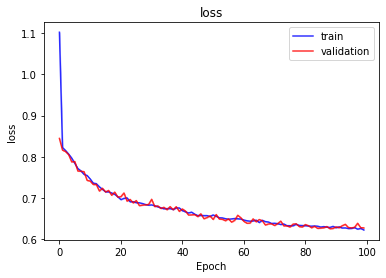

<b>bioma_loss</b>: 0.2035 (min: 0.2035, max: 0.2035)

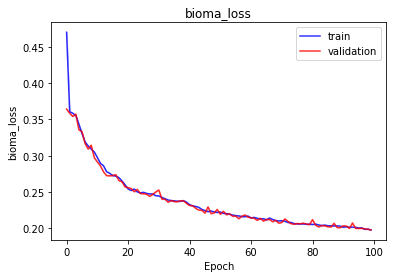

<b>domain_loss</b>: 0.4066 (min: 0.4066, max: 0.4066)

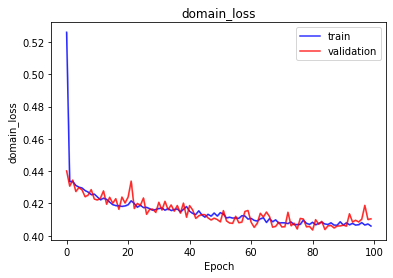

<b>latent_loss</b>: 0.0181 (min: 0.0181, max: 0.0181)

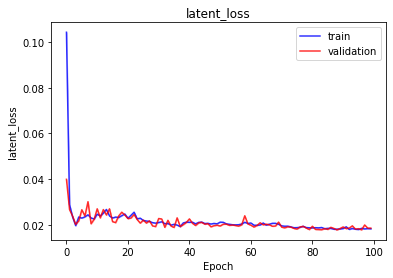

<b>bioma_mse</b>: 0.0000 (min: 0.0000, max: 0.0000)

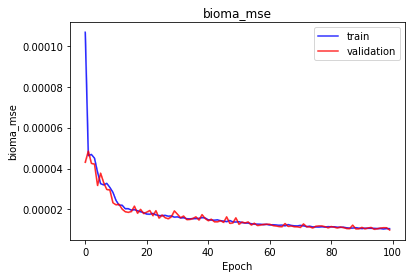

<b>bioma_mae</b>: 0.0006 (min: 0.0006, max: 0.0006)

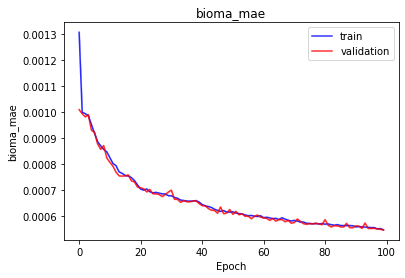

<b>bioma_mape</b>: 4990.9136 (min: 4990.9136, max: 4990.9136)

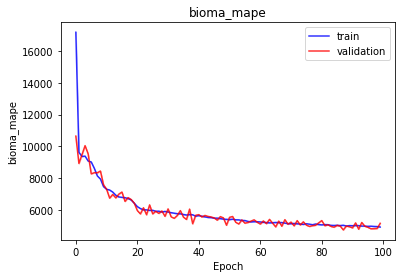

<b>bioma_BrayCurtis</b>: 0.2037 (min: 0.2037, max: 0.2037)

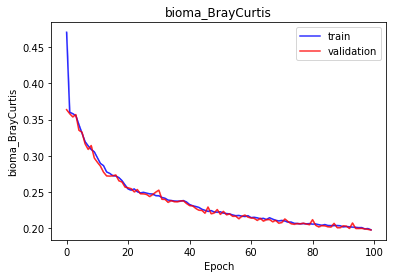

<b>bioma_pearson_corr</b>: 0.9189 (min: 0.9189, max: 0.9189)

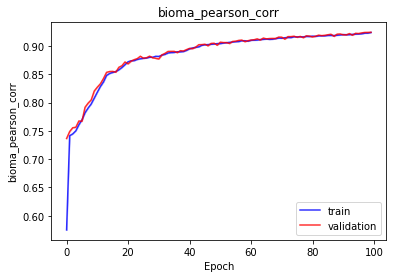

<b>bioma_jensen_shannon_divergence</b>: 0.3575 (min: 0.3575, max: 0.3575)

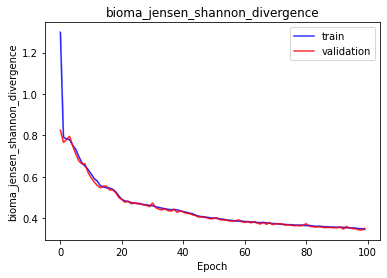

<b>domain_mse</b>: 0.0001 (min: 0.0001, max: 0.0001)

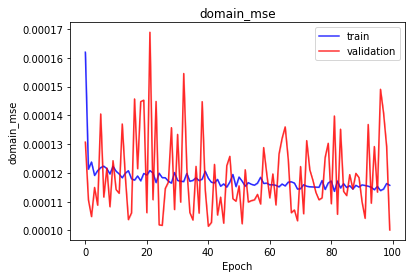

<b>domain_mae</b>: 0.0011 (min: 0.0011, max: 0.0011)

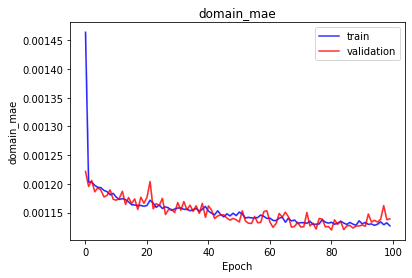

<b>domain_mape</b>: 8071.3364 (min: 8071.3364, max: 8071.3364)

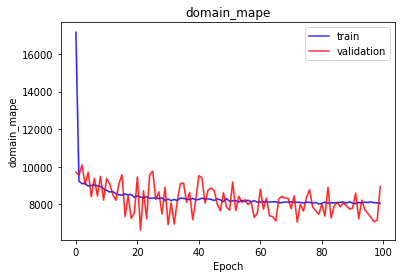

<b>domain_BrayCurtis</b>: 0.4063 (min: 0.4063, max: 0.4063)

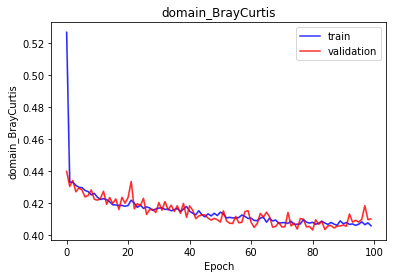

<b>domain_pearson_corr</b>: 0.7299 (min: 0.7299, max: 0.7299)

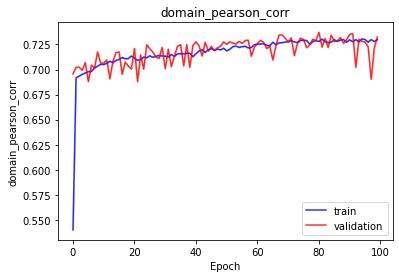

<b>domain_jensen_shannon_divergence</b>: 0.8937 (min: 0.8937, max: 0.8937)

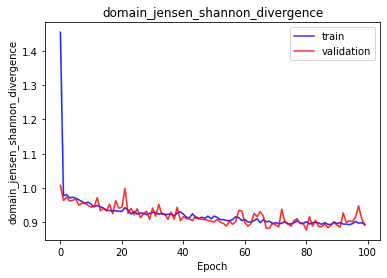

<b>latent_mae</b>: 0.0181 (min: 0.0181, max: 0.0181)

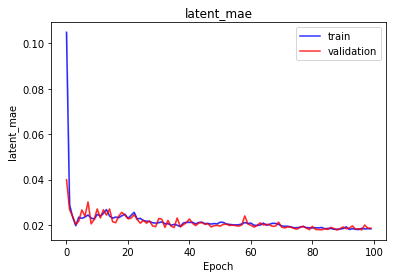

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 0.6281308365468277 | 0.6281308365468277 | 0.6281308365468277 |
| bioma_loss | 0.20353731513023376 | 0.20353731513023376 | 0.20353731513023376 |
| domain_loss | 0.40655675530433655 | 0.40655675530433655 | 0.40655675530433655 |
| latent_loss | 0.018124405294656754 | 0.018124405294656754 | 0.018124405294656754 |
| bioma_mse | 1.11272174763144e-05 | 1.11272174763144e-05 | 1.11272174763144e-05 |
| bioma_mae | 0.0005624765763059258 | 0.0005624765763059258 | 0.0005624765763059258 |
| bioma_mape | 4990.91357421875 | 4990.91357421875 | 4990.91357421875 |
| bioma_BrayCurtis | 0.2036895602941513 | 0.2036895602941513 | 0.2036895602941513 |
| bioma_pearson_corr | 0.918918788433075 | 0.918918788433075 | 0.918918788433075 |
| bioma_jensen_shannon_divergence | 0.3575323224067688 | 0.3575323224067688 | 0.3575323224067688 |
| domain_mse | 0.00011569513299036771 | 0.00011569513299036771 | 0.00011569513299036771 |
| domain_mae | 0.0011279369937255979 | 0.0011279369937255979 | 0.0011279369937255979 |
| domain_mape | 8071.33642578125 | 8071.33642578125 | 8071.33642578125 |
| domain_BrayCurtis | 0.40633508563041687 | 0.40633508563041687 | 0.40633508563041687 |
| domain_pearson_corr | 0.7299425005912781 | 0.7299425005912781 | 0.7299425005912781 |
| domain_jensen_shannon_divergence | 0.8937239050865173 | 0.8937239050865173 | 0.8937239050865173 |
| latent_mae | 0.018106121569871902 | 0.018106121569871902 | 0.018106121569871902 |


*************

In [32]:
# Train the selected model (the best one from those with the smallest latent space (10)): no.351
experiment_metrics, models, results = perform_experiment(cv_folds=0, 
                        epochs=100, 
                        batch_size=64, 
                        learning_rate=0.001, 
                        optimizer=optimizers.Adam,
                        learning_rate_scheduler=None,
                        input_transform=Percentage,
                        output_transform=tf.keras.layers.Softmax,
                        reconstruction_loss=MakeLoss(LossBrayCurtis, Percentage, None), 
                        latent_space=10, 
                        layers=[512,256],
                        activation='tanh', 
                        activation_latent='tanh',
                        show_results=True, 
                        device='/CPU:0')

In [33]:
data_domain_train.shape

(4251, 36)

### To get encoders and decoders to use in transfer learning model

In [34]:
model, encoder, encoder_domain, decoder = models[0]

### To recover data with subset domain features

In [35]:
df_microbioma_train, df_microbioma_test, \
df_microbioma_transfer_learning_train, df_microbioma_transfer_learning_test, \
df_domain_train, df_domain_test, df_domain_transfer_learning_train, df_domain_transfer_learning_test,\
otu_columns, domain_columns = \
    read_df_with_transfer_learning_2otufiles_fewerDomainFeatures(
              metadata_names=['age','Temperature','Precipitation3Days'],
              otu_filename='data/otu_table_all_80.csv',
              metadata_filename='data/metadata_table_all_80.csv',
              otu_transfer_filename='data/Walters5yearsLater/otu_table_Walters5yearsLater.csv',
              metadata_transfer_filename='data/Walters5yearsLater/metadata_table_Walters5yearsLater.csv')

In [36]:
df_domain_train.shape

(4251, 3)

### To predict latent space for samples in transfer learning Walters et al. subset

In [37]:
latent_transfer_learning_train = encoder.predict(data_microbioma_transfer_learning_train)
latent_transfer_learning_test = encoder.predict(data_microbioma_transfer_learning_test)

### To build model to predict latent space 

In [38]:
def model_fn_tl():
    in_layer = layers.Input(shape=(3,))
    net = layers.Dense(128, activation='tanh')(in_layer)
    net = layers.Dense(32, activation='tanh')(net)
    out_layer = layers.Dense(latent_transfer_learning_train.shape[1], activation=None)(net) # 'tanh already'
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    model.compile(optimizer=optimizers.Adam(lr=0.001), loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanSquaredError()])
    return model

In [39]:
result_tl, model_tl = train_tl_noEnsemble(model_fn_tl,
                            latent_transfer_learning_train,
                            latent_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            epochs=100,
                            batch_size=16,
                            verbose=-1)
#print_results(result_tl)
#print(result_tl)

In [40]:
# Test only Dense(domain->latent)
predictions = test_model_tl_latent(model_tl, latent_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_MLP_domain-latent_test.txt')


## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| mse | 0.001871894346550107 | 4.520291341236771e-08 | 0.08605027943849564 |


### Domain -> latent -> microbiome. Test set TL

In [41]:
predictions = test_model_tl_noEnsemble(model_tl, decoder, Percentage, tf.keras.layers.Softmax, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.8179481029510498 | 0.8179481029510498 | 0.8179481029510498 |
| pearson_corr | 0.14780426025390625 | 0.14780426025390625 | 0.14780426025390625 |
| jensen_shannon_divergence | 3.6390695571899414 | 3.6390695571899414 | 3.6390695571899414 |


# 5. Auto-encoder OTU latent <a name="AE_latentOTU"></a>

In [42]:
from train_2 import *

### Get microbioma train data and numpy train objects

In [43]:
df_microbioma_train, df_microbioma_test, \
df_microbioma_transfer_learning_train, df_microbioma_transfer_learning_test, \
df_domain_train, df_domain_test, df_domain_transfer_learning_train, df_domain_transfer_learning_test,\
otu_columns, domain_columns = read_df_with_transfer_learning_subset()

In [44]:
data_microbioma_train = df_microbioma_train.to_numpy(dtype=np.float32)

In [45]:
data_microbioma_train.shape[1]

717

| Parameter             | Value         |
|:----------------------|:--------------|
| Input transform | Percentage |
| Output transform | Softmax |
| Reconstruction Loss | LossBrayCurtis |
| Latent Space | 10 |
| Bioma Autoencoder | b -> 512 -> 256 -> 10 -> 256 -> 512 -> b |
| Domain Autoencoder |   |
| Activation Encoder | tanh |
| Activation Decoder | tanh |
| Activation Latent | tanh |
| CV folds | 0 |
| Epochs | 100 |
| Batch Size | 64 |
| Learning Rate Scheduler | none |
| Learning Rate | constant = 0.001 |
| Optimizer | Adam |


<p>Best iteration: <b>99</b></p>

<b>loss</b>: 0.1631 (min: 0.1631, max: 0.1631)

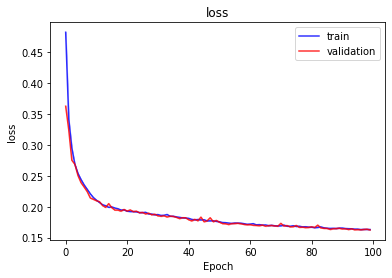

<b>bioma_mse</b>: 0.0000 (min: 0.0000, max: 0.0000)

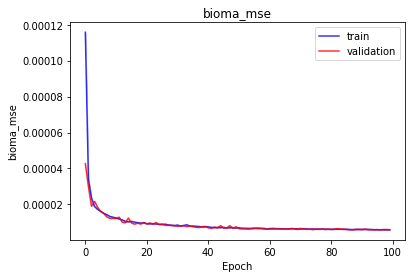

<b>bioma_mae</b>: 0.0004 (min: 0.0004, max: 0.0004)

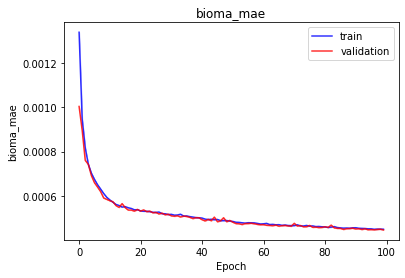

<b>bioma_mape</b>: 4060.0955 (min: 4060.0955, max: 4060.0955)

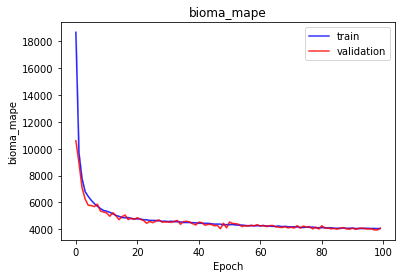

<b>bioma_BrayCurtis</b>: 0.1631 (min: 0.1631, max: 0.1631)

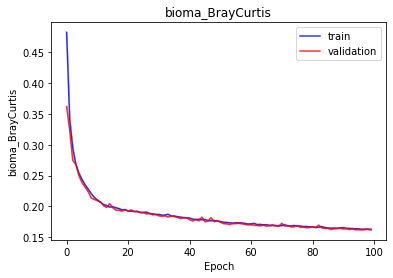

<b>bioma_pearson_corr</b>: 0.9495 (min: 0.9495, max: 0.9495)

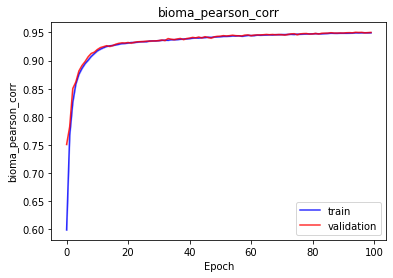

<b>bioma_jensen_shannon_divergence</b>: 0.2646 (min: 0.2646, max: 0.2646)

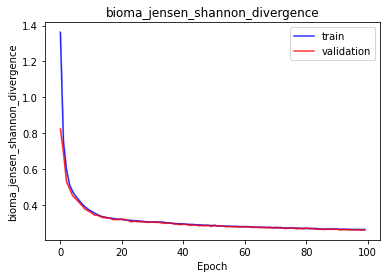

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 0.16313993290743248 | 0.16313993290743248 | 0.16313993290743248 |
| bioma_mse | 5.9371814131736755e-06 | 5.9371814131736755e-06 | 5.9371814131736755e-06 |
| bioma_mae | 0.00044932746095582843 | 0.00044932746095582843 | 0.00044932746095582843 |
| bioma_mape | 4060.095458984375 | 4060.095458984375 | 4060.095458984375 |
| bioma_BrayCurtis | 0.1631399542093277 | 0.1631399542093277 | 0.1631399542093277 |
| bioma_pearson_corr | 0.9494578838348389 | 0.9494578838348389 | 0.9494578838348389 |
| bioma_jensen_shannon_divergence | 0.264644593000412 | 0.264644593000412 | 0.264644593000412 |


*************

In [46]:
# Train the selected model (the best one from those with the smallest latent space (10)): no.351
experiment_metrics, models, results = perform_experiment_2(cv_folds=0, 
                        epochs=100, 
                        batch_size=64, 
                        learning_rate=0.001, 
                        optimizer=optimizers.Adam,
                        learning_rate_scheduler=None,
                        input_transform=Percentage,
                        output_transform=tf.keras.layers.Softmax,
                        reconstruction_loss=MakeLoss(LossBrayCurtis, Percentage, None), 
                        latent_space=10, 
                        layers=[512,256],
                        activation='tanh', 
                        activation_latent='tanh', 
                        data_microbioma_train=data_microbioma_train,
                        data_domain_train=None,
                        show_results=True, 
                        device='/CPU:0')

### To get encoders and decoders to use in transfer learning model

In [47]:
model, encoder, _, decoder = models[0]

In [48]:
#encoder = tf.keras.models.load_model('encoder_biome.h5')
#decoder = tf.keras.models.load_model('decoder.h5')

### To recover data with subset domain features

In [49]:
df_microbioma_train, df_microbioma_test, \
df_microbioma_transfer_learning_train, df_microbioma_transfer_learning_test, \
df_domain_train, df_domain_test, df_domain_transfer_learning_train, df_domain_transfer_learning_test,\
otu_columns, domain_columns = \
    read_df_with_transfer_learning_2otufiles_fewerDomainFeatures(
              metadata_names=['age','Temperature','Precipitation3Days'],
              otu_filename='data/otu_table_all_80.csv',
              metadata_filename='data/metadata_table_all_80.csv',
              otu_transfer_filename='data/Walters5yearsLater/otu_table_Walters5yearsLater.csv',
              metadata_transfer_filename='data/Walters5yearsLater/metadata_table_Walters5yearsLater.csv')

### Get numpy transfer_learning objects

In [50]:
data_microbioma_transfer_learning_train = df_microbioma_transfer_learning_train.to_numpy(dtype=np.float32)
data_microbioma_transfer_learning_test = df_microbioma_transfer_learning_test.to_numpy(dtype=np.float32)
data_domain_transfer_learning_train = df_domain_transfer_learning_train.to_numpy(dtype=np.float32)
data_domain_transfer_learning_test = df_domain_transfer_learning_test.to_numpy(dtype=np.float32)

In [51]:
data_microbioma_transfer_learning_test.sum(axis=1)

array([143467., 124733., 138930., 123039.,  87400., 127060.,  93978.,
        95265.,  83973.,  86968., 128873.,  80235., 100393.],
      dtype=float32)

### To predict latent space for samples in transfer learning Walters et al. subset

In [52]:
latent_transfer_learning_train = encoder.predict(data_microbioma_transfer_learning_train)
latent_transfer_learning_test = encoder.predict(data_microbioma_transfer_learning_test)

In [53]:
#print(latent_transfer_learning_test)
with np.printoptions(precision=3, suppress=True):
    #print(latent_transfer_learning_train.min())
    #print(latent_transfer_learning_train.max())
    print(latent_transfer_learning_train.mean(axis=0))
    #print(latent_transfer_learning_test.min())
    #print(latent_transfer_learning_test.max())    
    print(latent_transfer_learning_test.mean(axis=0))

[-0.023 -0.04   0.406  0.155 -0.561  0.556 -0.027  0.282  0.065 -0.597]
[-0.04   0.048  0.453  0.158 -0.59   0.595  0.099  0.269  0.062 -0.653]


In [54]:
decoder = tf.keras.models.load_model('decoder.h5')

In [55]:
latent_transfer_learning_train.shape[1]

10

### To build model to predict latent space 

In [56]:
def model_fn_tl():
    in_layer = layers.Input(shape=(3,))  
    net = layers.Dense(64, activation='tanh')(in_layer)
    net = layers.Dense(32, activation='tanh')(net)
    net = layers.Dense(16, activation='tanh')(net)  
    out_layer = layers.Dense(latent_transfer_learning_train.shape[1], activation=None)(net) # 'tanh already'
    model = keras.Model(inputs=[in_layer], outputs=[out_layer], name='model')
    model.compile(optimizer=optimizers.Adam(lr=0.01), loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanSquaredError()])
    return model

In [57]:
result_tl, model_tl = train_tl_noEnsemble(model_fn_tl,
                            latent_transfer_learning_train,
                            latent_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            data_domain_transfer_learning_train,
                            epochs=100,
                            batch_size=16,
                            verbose=-1)
#print_results(result_tl)
print(result_tl)

In [58]:
print_results_noEnsemble(result_tl)

<p>Best iteration: <b>99</b></p>

| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| loss | 0.048043713973000134 | 0.03498932038401735 | 0.5500291164579063 |
| domain_mean_squared_error | 0.048043712973594666 | 0.03498931974172592 | 0.5500290989875793 |


In [59]:
# Test only Dense(domain->latent)
predictions = test_model_tl_latent(model_tl, latent_transfer_learning_test, data_domain_transfer_learning_test)
#save_predictions(predictions, 'experiment_transfer_learning_WaltersSubset_MLP_domain-latent_test.txt')

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| mse | 0.034476667642593384 | 3.7233985494822264e-06 | 0.26376938819885254 |


### Domain -> latent -> microbiome. Test set TL

In [60]:
predictions = test_model_tl_noEnsemble(model_tl, decoder, Percentage, tf.keras.layers.Softmax, data_microbioma_transfer_learning_test, data_domain_transfer_learning_test)

## Test results 
| Metric           | Mean    | Min     | Max     |
|:-----------------|--------:|--------:|--------:|
| BrayCurtis | 0.8021209239959717 | 0.8021209239959717 | 0.8021209239959717 |
| pearson_corr | 0.15855851769447327 | 0.15855851769447327 | 0.15855851769447327 |
| jensen_shannon_divergence | 3.8043277263641357 | 3.8043277263641357 | 3.8043277263641357 |


In [61]:
predictions
save_predictions(predictions, 'experiment_transfer_learning_5yearsLater_domain-latent_AE_OTUlatent_3var.txt')

In [62]:
df_microbioma_transfer_learning_test.T.to_csv('otus_original_transfer_learning_5yearsLaterWalters.tsv', index=True, header=True, sep='\t')

In [63]:
def save_predicted_otu_table_and_latent(pred,pred_latent,sample_names,otu_names,suffix=''):
    df_otu = pd.DataFrame(pred, index=sample_names, columns=otu_names)
    df_otu.T.to_csv('otus_'+suffix+'.tsv', index=True, header=True, sep='\t')

    df_latent = pd.DataFrame(pred_latent, index=sample_names)
    df_latent.T.to_csv('latent_'+suffix+'.tsv', index=True, sep='\t')
    
    return df_otu, df_latent